Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = r"C:\Users\SHAUN\Desktop\s\ADANIENT.NS.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,45.553741,49.422543,44.872616,49.095600,47.614208,10963906
1,2016-01-04,48.768658,50.158157,45.907928,46.371094,44.971912,9408965
2,2016-01-05,46.670792,48.823151,45.880684,48.278248,46.821522,9801814
3,2016-01-06,47.951309,48.468964,46.480076,46.997730,45.579639,7093448
4,2016-01-07,46.262115,46.262115,42.502296,43.564854,42.250347,8919023


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1745,2023-01-23,3443.050049,3460.000000,3412.550049,3436.350098,3436.350098,974857
1746,2023-01-24,3447.449951,3508.000000,3430.000000,3442.000000,3442.000000,1518123
1747,2023-01-25,3422.000000,3428.000000,3315.000000,3388.949951,3388.949951,3686439
1748,2023-01-27,3335.000000,3346.500000,2712.000000,2761.449951,2761.449951,14764368
1749,2023-01-30,2850.000000,3037.550049,2665.000000,2892.850098,2892.850098,20947906


In [5]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()


,Open,High,Low,Close,Volume
0,45.553741,49.422543,44.872616,49.095600,10963906
1,48.768658,50.158157,45.907928,46.371094,9408965
2,46.670792,48.823151,45.880684,48.278248,9801814
3,47.951309,48.468964,46.480076,46.997730,7093448
4,46.262115,46.262115,42.502296,43.564854,8919023


Text(0.5, 1.0, 'Closing Price of Stock Data')

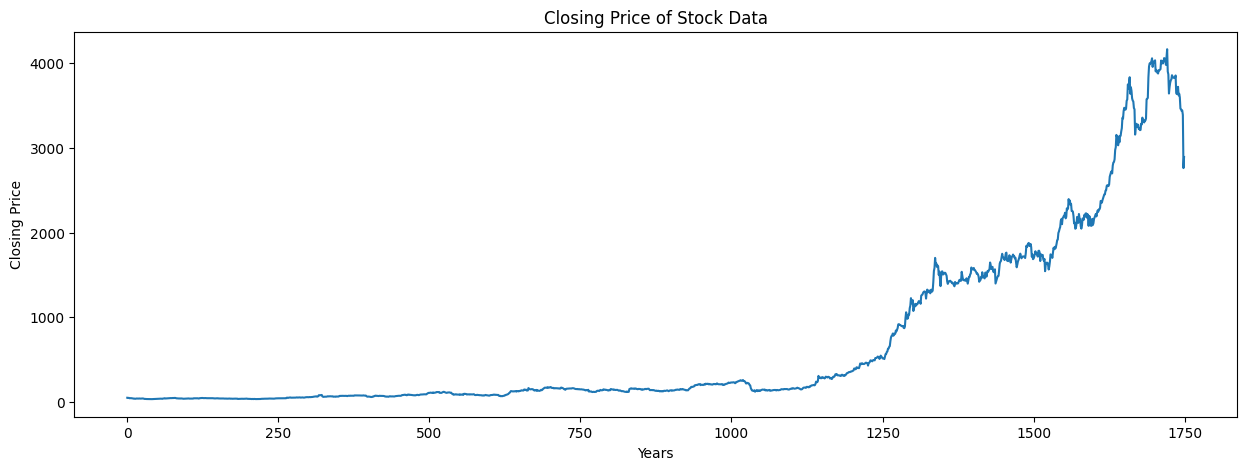

In [6]:
plt.figure(figsize = (15,5))
df['Close'].plot()
plt.xlabel("Years")
plt.ylabel("Closing Price")
plt.title("Closing Price of Stock Data")

In [7]:
def plot_graph(figsize, values, column_name):
    plt.figure(figsize=figsize)
    values.plot()
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Stock Data")

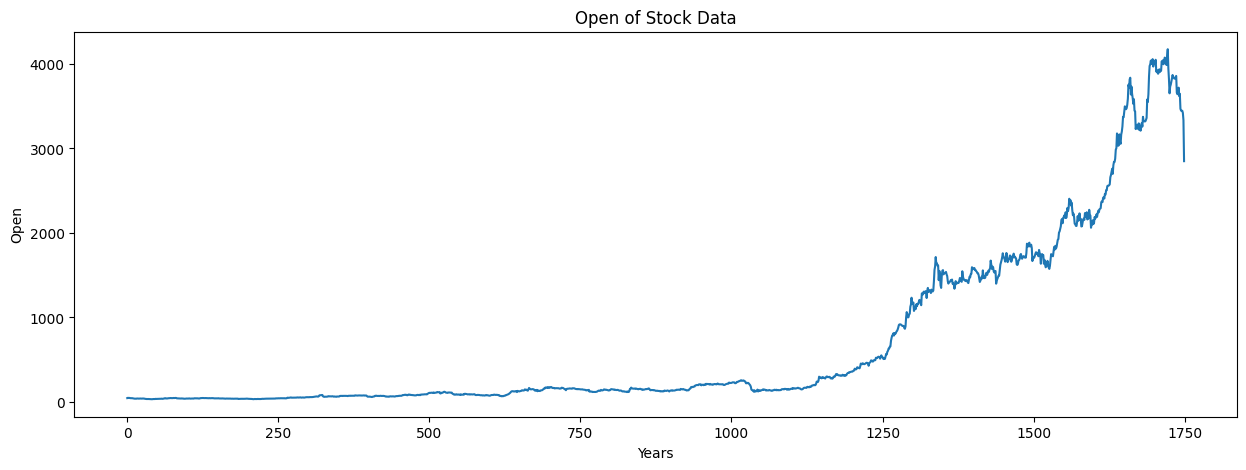

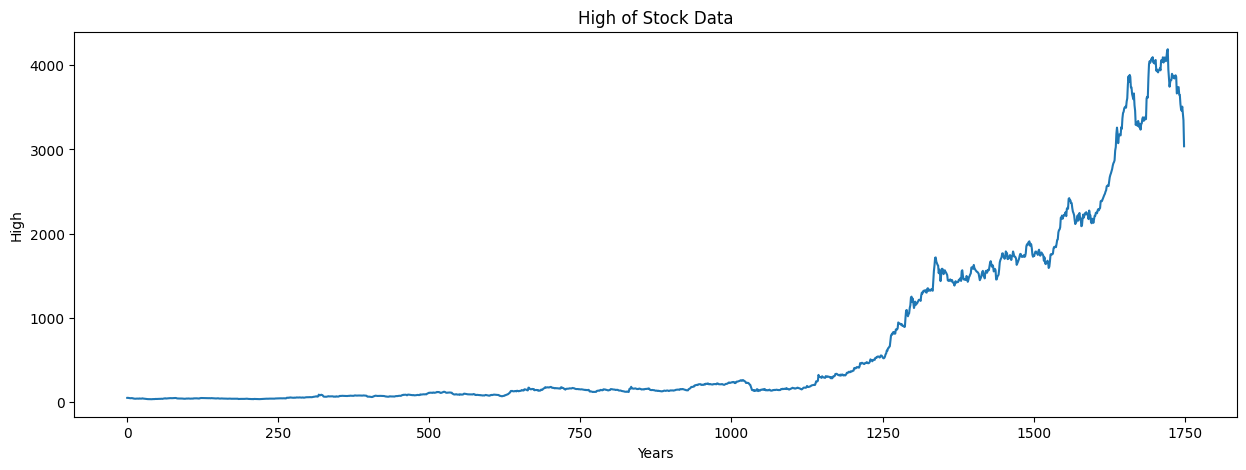

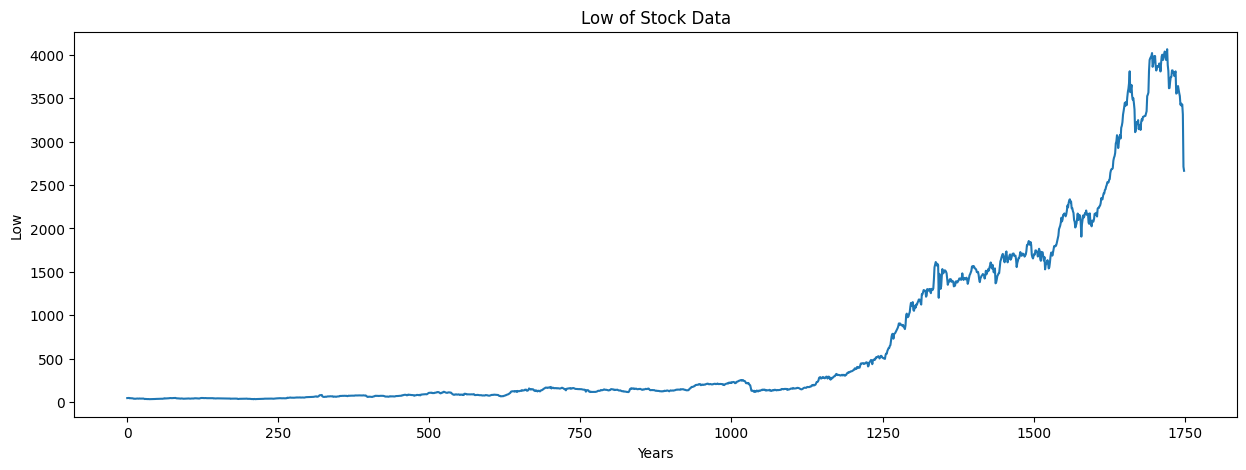

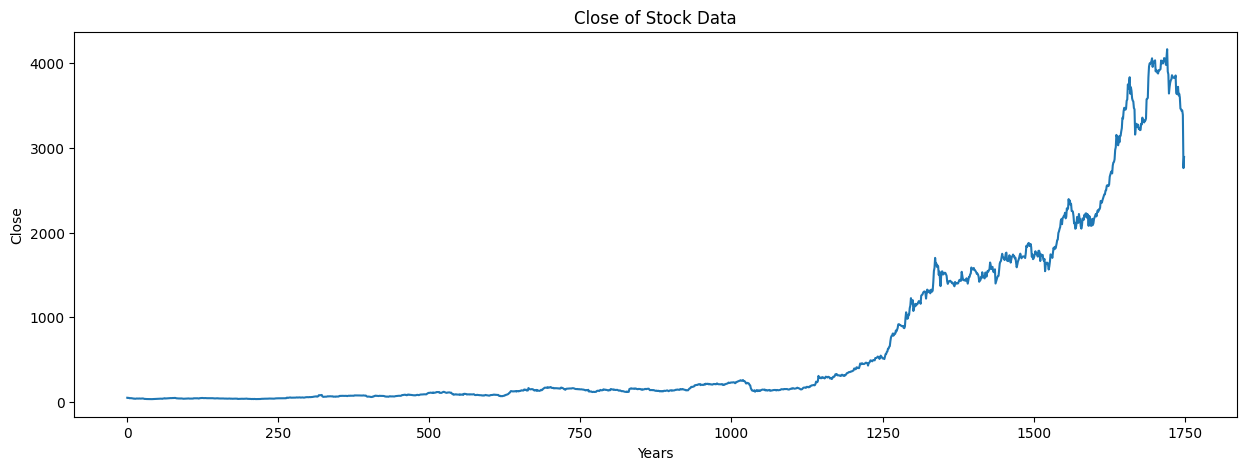

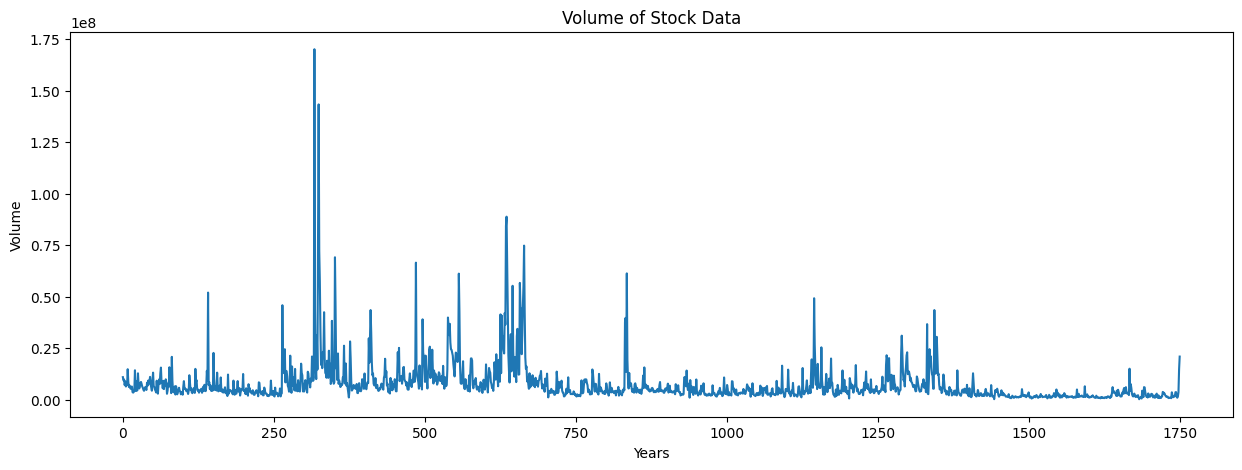

In [8]:
for column in df.columns:
    plot_graph((15,5), df[column], column)

In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1745    3677.736006
1746    3679.823506
1747    3680.155005
1748    3674.304004
1749    3668.874504
Name: Close, Length: 1750, dtype: float64

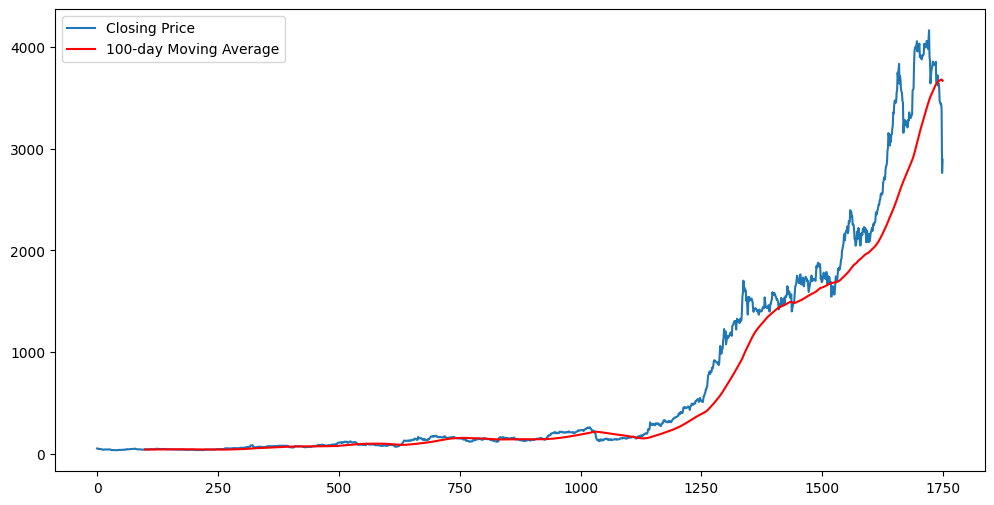

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close, label="Closing Price")
plt.plot(ma100, label="100-day Moving Average", color='red')
plt.legend()
plt.show()


In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1745    3029.845003
1746    3036.255003
1747    3042.704503
1748    3045.657003
1749    3049.220253
Name: Close, Length: 1750, dtype: float64

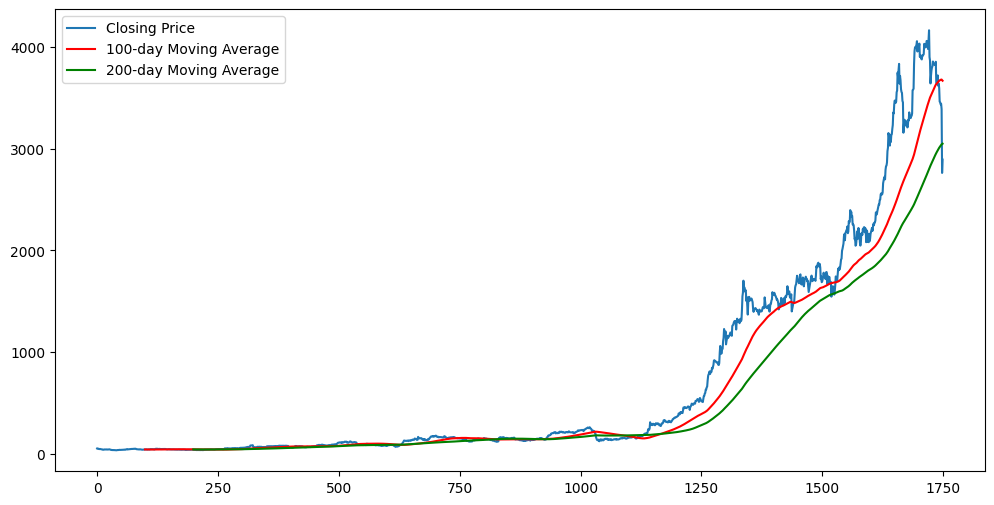

In [12]:
ma200 = df.Close.rolling(200).mean()  # Calculate 200-day moving average

plt.figure(figsize=(12,6))
plt.plot(df.Close, label="Closing Price")
plt.plot(ma100, label="100-day Moving Average", color='red')
plt.plot(ma200, label="200-day Moving Average", color='green')  # Add 200-day MA
plt.legend()
plt.show()

In [13]:
df.shape

(1750, 5)

In [14]:
df.describe()

,Open,High,Low,Close,Volume
count,1750.000000,1750.000000,1750.000000,1750.000000,1.750000e+03
mean,688.173234,700.569161,675.238559,688.457278,7.511264e+06
std,1021.967477,1036.977084,1004.148913,1021.222423,1.019781e+07
min,32.149174,33.402447,31.713251,32.012947,2.482490e+05
25%,74.134321,75.891117,72.430996,74.392643,2.789816e+06
50%,148.150002,152.000000,144.975006,148.025002,4.716164e+06
75%,1193.587524,1237.750000,1173.500000,1198.837524,8.319164e+06
max,4175.000000,4190.000000,4066.399902,4165.299805,1.701502e+08


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1750 non-null   float64
 1   High    1750 non-null   float64
 2   Low     1750 non-null   float64
 3   Close   1750 non-null   float64
 4   Volume  1750 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 68.5 KB


splitting the data into 70:30 ratio 

In [16]:
# Splitting Data into Training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])  
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])  

print(data_training.shape)
print(data_testing.shape)


(1225, 1)
(525, 1)


In [17]:
data_training.head()

,Close
0,49.095600
1,46.371094
2,48.278248
3,46.997730
4,43.564854


In [18]:
data_testing.head()

,Close
1225,455.149994
1226,429.200012
1227,458.799988
1228,463.600006
1229,473.649994


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
# Scale all relevant features, not just 'Close'
data_training_array = scaler.fit_transform(data_training)
data_training_array


array([[0.03961314],
       [0.03329525],
       [0.03771777],
       ...,
       [0.9981449 ],
       [1.        ],
       [0.99084028]])

In [21]:
data_training_array.shape

(1225, 1)

In [22]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):  
    x_train.append(data_training_array[i-100:i])  # Sequence of past 100 values
    y_train.append(data_training_array[i, 0])    # Target value

x_train, y_train = np.array(x_train), np.array(y_train)



MACHINE LEARNING

In [23]:
from keras.layers import Dense, Dropout, LSTM 
from keras.models import Sequential

In [25]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1))  # Predicting a single value


In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
print(x_train.shape)


(1125, 100, 1)


In [28]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - loss: 0.0465
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0060
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 0.0052
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0053
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0049
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0042
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 0.0041
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0036
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0042
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0037
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0043
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.0029
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0031
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0041
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0028
Epoc

In [29]:
model.save('stock_keras_model.keras')


In [30]:
data_testing.head()

,Close
1225,455.149994
1226,429.200012
1227,458.799988
1228,463.600006
1229,473.649994


In [31]:
data_testing.head()

,Close
1225,455.149994
1226,429.200012
1227,458.799988
1228,463.600006
1229,473.649994


In [32]:
past_100_days = data_training.tail(100)

In [33]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [34]:
final_df.head()

,Close
0,179.100006
1,175.050003
2,175.250000
3,172.250000
4,182.100006


In [35]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.71548223e-03],
       [7.01219152e-04],
       [7.51305430e-04],
       [0.00000000e+00],
       [2.46678766e-03],
       [1.84069981e-03],
       [3.43096071e-03],
       [5.17148421e-03],
       [5.87270336e-03],
       [5.91027088e-03],
       [6.37357364e-03],
       [7.13740158e-03],
       [5.99792093e-03],
       [6.39861866e-03],
       [1.03805359e-02],
       [1.68542859e-02],
       [1.54643701e-02],
       [1.53015888e-02],
       [1.91457660e-02],
       [3.38838719e-02],
       [2.83742987e-02],
       [2.86623052e-02],
       [2.90504766e-02],
       [2.68716879e-02],
       [2.72598668e-02],
       [3.02525623e-02],
       [2.98017820e-02],
       [2.82741262e-02],
       [2.82991712e-02],
       [2.64083889e-02],
       [2.77482109e-02],
       [3.15673468e-02],
       [3.09913490e-02],
       [3.02776073e-02],
       [2.91256042e-02],
       [3.12668291e-02],
       [3.04153512e-02],
       [2.98769096e-02],
       [2.62581263e-02],
       [2.70845592e-02],


In [36]:
input_data.shape

(625, 1)

In [37]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [38]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(525, 100, 1)
(525,)


Making prediction

In [39]:

y_predicted = model.predict(x_test)  # Correct function name


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


In [40]:
y_predicted.shape

(525, 1)

In [41]:
y_test

array([0.0708481 , 0.06434931, 0.07176219, 0.07296428, 0.07548115,
       0.07978864, 0.07937542, 0.07811072, 0.07695872, 0.07986377,
       0.08070272, 0.08067768, 0.07980116, 0.08661299, 0.08658795,
       0.08687596, 0.08844118, 0.0911083 , 0.09011908, 0.08891699,
       0.08404604, 0.08961821, 0.09378796, 0.09132118, 0.08879178,
       0.08556117, 0.08528569, 0.08504778, 0.08374551, 0.09139631,
       0.09815806, 0.09875909, 0.10454415, 0.1059591 , 0.11421094,
       0.11459912, 0.1198207 , 0.12179913, 0.1369129 , 0.14805726,
       0.15225205, 0.15356683, 0.15926423, 0.15267779, 0.15868823,
       0.15712301, 0.15851293, 0.16810459, 0.16563781, 0.17010807,
       0.17537973, 0.18609835, 0.18686219, 0.18473349, 0.18480862,
       0.18355644, 0.18179088, 0.1807766 , 0.18130252, 0.18170322,
       0.17571782, 0.17500408, 0.17966218, 0.20505629, 0.22192311,
       0.21367125, 0.20267716, 0.2043676 , 0.21519893, 0.21509875,
       0.23414432, 0.24192035, 0.26374578, 0.24875724, 0.24799

In [42]:
y_predicted

array([[0.07075392],
       [0.07164638],
       [0.07249491],
       [0.07329047],
       [0.07403037],
       [0.07471848],
       [0.07536635],
       [0.0759871 ],
       [0.07659516],
       [0.07719826],
       [0.07780278],
       [0.07841359],
       [0.07903307],
       [0.07965972],
       [0.08029844],
       [0.08095527],
       [0.08163479],
       [0.08234066],
       [0.08307746],
       [0.08384635],
       [0.08464308],
       [0.08545372],
       [0.08626736],
       [0.08708043],
       [0.08788905],
       [0.0887081 ],
       [0.08952312],
       [0.09031582],
       [0.09106822],
       [0.09176168],
       [0.0923968 ],
       [0.09299047],
       [0.09356199],
       [0.09413278],
       [0.0947196 ],
       [0.09534888],
       [0.09604044],
       [0.09681424],
       [0.09768479],
       [0.0987143 ],
       [0.100025  ],
       [0.10173301],
       [0.10387462],
       [0.10661488],
       [0.109941  ],
       [0.11388282],
       [0.11832703],
       [0.122

In [43]:
scaler.scale_

array([0.00025044])

In [44]:
scale_factor = 1/0.00025044
y_predicted = y_predicted *scale_factor
y_test = y_test * scale_factor

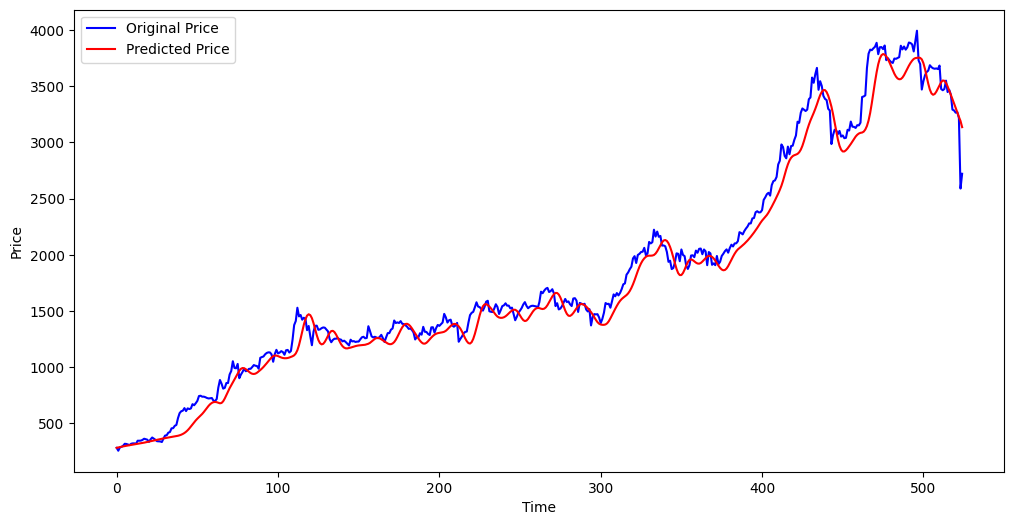

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' , label = 'Original Price')  # Actual values
plt.plot(y_predicted, 'r' , label = 'Predicted Price')  # Model predictions
plt.xlabel('Time')
plt.ylabel('Price')  # Fix incorrect second xlabel
plt.legend()
plt.show()
